In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/sentiment_dataset (2).csv", encoding="latin-1")


In [ ]:
df

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
53160,0,1680085393,Sat May 02 10:52:09 PDT 2009,NO_QUERY,roogie,@maccast The 5.01 ep isn't on iTunes mobile yet.
53161,0,1680085398,Sat May 02 10:52:09 PDT 2009,NO_QUERY,Maughanster,im exhausted and sweaty
53162,0,1680085425,Sat May 02 10:52:09 PDT 2009,NO_QUERY,meznor,"Hi @backupblack. Going to #tfc. Excited, but i..."
53163,0,1680085857,Sat May 02 10:52:12 PDT 2009,NO_QUERY,JulianaIsabel,"I just want to be seen as the person I am, not..."


In [ ]:
df.shape

(53165, 6)

In [ ]:
df.describe()

,val,id
count,53165.0,5.316500e+04
mean,0.0,1.571006e+09
std,0.0,6.526742e+07
min,0.0,1.467810e+09
25%,0.0,1.553178e+09
50%,0.0,1.558816e+09
75%,0.0,1.573644e+09
max,0.0,1.680086e+09


In [ ]:
df.isnull()

,val,id,timestamp,query,username,tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
53160,False,False,False,False,False,False
53161,False,False,False,False,False,False
53162,False,False,False,False,False,False
53163,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

val          0
id           0
timestamp    0
query        0
username     0
tweet        1
dtype: int64

In [ ]:
df[df.duplicated()]

,val,id,timestamp,query,username,tweet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53165 entries, 0 to 53164
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        53165 non-null  int64 
 1   id         53165 non-null  int64 
 2   timestamp  53165 non-null  object
 3   query      53165 non-null  object
 4   username   53165 non-null  object
 5   tweet      53164 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['query','username','tweet']
for i in col:
  df[i] = encoder.fit_transform(df[i])

In [ ]:
m=df['query'].mean()
df['query']=df['query'].fillna(m)

In [ ]:
m=df['username'].mean()
df['username']=df['username'].fillna(m)

In [ ]:
df.describe()

,val,id,query,username,tweet
count,53165.0,5.316500e+04,53165.0,53165.000000,53165.000000
mean,0.0,1.571006e+09,0.0,22210.217455,26314.263745
std,0.0,6.526742e+07,0.0,12792.190859,15217.816223
min,0.0,1.467810e+09,0.0,0.000000,0.000000
25%,0.0,1.553178e+09,0.0,11146.000000,13113.000000
50%,0.0,1.558816e+09,0.0,22220.000000,26288.000000
75%,0.0,1.573644e+09,0.0,33387.000000,39514.000000
max,0.0,1.680086e+09,0.0,44073.000000,52691.000000


In [ ]:
df['timestamp'].describe()

count                            53165
unique                           43739
top       Sat Apr 18 21:22:31 PDT 2009
freq                                 6
Name: timestamp, dtype: object

In [ ]:
df.describe()

,val,id,query,username,tweet
count,53165.0,5.316500e+04,53165.0,53165.000000,53165.000000
mean,0.0,1.571006e+09,0.0,22210.217455,26314.263745
std,0.0,6.526742e+07,0.0,12792.190859,15217.816223
min,0.0,1.467810e+09,0.0,0.000000,0.000000
25%,0.0,1.553178e+09,0.0,11146.000000,13113.000000
50%,0.0,1.558816e+09,0.0,22220.000000,26288.000000
75%,0.0,1.573644e+09,0.0,33387.000000,39514.000000
max,0.0,1.680086e+09,0.0,44073.000000,52691.000000


In [ ]:
df1 = df.select_dtypes(np.number)
df1.corr()

,val,id,query,username,tweet
val,NaN,NaN,NaN,NaN,NaN
id,NaN,1.000000,NaN,0.000718,-0.011552
query,NaN,NaN,NaN,NaN,NaN
username,NaN,0.000718,NaN,1.000000,0.018341
tweet,NaN,-0.011552,NaN,0.018341,1.000000


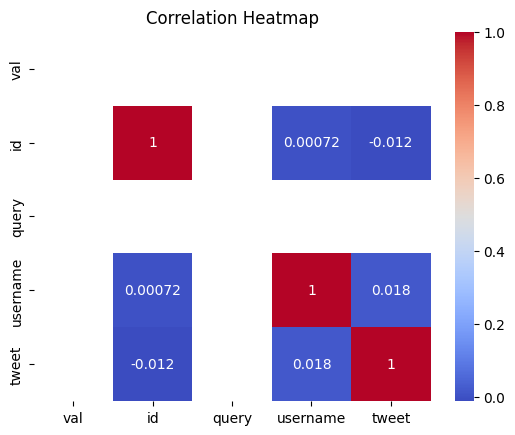

In [ ]:
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
col1 = ['query']
x = df[col1]
y = df['tweet']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0.0
Mean Squared Error: 232301837.9016381
R^2 Score: -2.0787683479461805e-05
